In [1]:
%matplotlib inline

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import rc
from analysis import Data as 

In [3]:
class Data:
    def __init__(self, input, display=True, lumi=20*1000):
        self.data_ = pd.read_csv(input+".evt", sep=',',skipinitialspace=True, comment="#", index_col=('evt') ) 
        self.obj_ = pd.read_csv(input+".obj", sep=',',skipinitialspace=True, comment="#", index_col=('evt','type','n') ) 
        self.meta = pd.read_csv(input+".meta", sep=',',skipinitialspace=True, comment="#", index_col=None )
        self.w_=np.asarray(self.meta.at[0,'cxn']*lumi/self.meta.at[0,'nevt'])
        
        self.data = self.data_
        self.obj = self.obj_
        self.w =np.repeat(self.w_, len(self.data.index))
        
        
    def select(self, criterion):
        self.data = self.data_.query(criterion)
        evt_list = list(self.data.index)
        self.obj = self.obj_.loc[evt_list]
        self.w =np.repeat(self.w_, len(self.data.index))
        
    def get_obj(self, type, n=1):
        return self.obj.xs((type, n), level=('type','n'))


In [4]:
# open data file

input_sig = "tchannel_13TeV_met800"
input_bkg_zjj = "zjj_13TeV_met800"

sig = Data(input_sig)
bkg_zjj = Data(input_bkg_zjj)


sig.data.head()

IOError: File tchannel_13TeV_met800.evt does not exist

In [6]:
# Dirty function to histogram all variables
# Need to call twice as of right now to get proper size

def harry_plotter(sigs, bkgs):
    n_vars = len(sig.data.columns.values)
    n_cols = 2
    n_rows = np.int(np.ceil(n_vars/n_cols))
    fig, axs = plt.subplots(n_rows,n_cols)
    plt.rcParams['figure.figsize'] = 14., 5*n_rows
    
    n_var = 0

    for i in range(n_rows):
        for j in range(n_cols):
            if n_var >= n_vars: continue
            var = sig.data.columns.values[n_var]
            binning = np.linspace(np.min(bkgs.data[var]),np.max(bkgs.data[var]),25)
            axs[i][j].hist([list(bkgs.data[var])],  bins=binning, stacked=True,color="green", weights=[bkgs.w],
                     log=True,
                     alpha=0.4, lw=0, label=r"$(Z\rightarrow\nu\nu)jj$")
            axs[i][j].hist(list(sig.data[var]), bins=binning, color="red", weights=sig.w,
                     alpha=1.0, lw=1.5, label=r"${\rm Signal}$",histtype="step",linestyle="dashed",log=True)
            axs[i][j].set_xlabel(var, labelpad=10)
            axs[i][j].legend(loc='best', fancybox=True, framealpha=0.5)
            n_var+=1
            

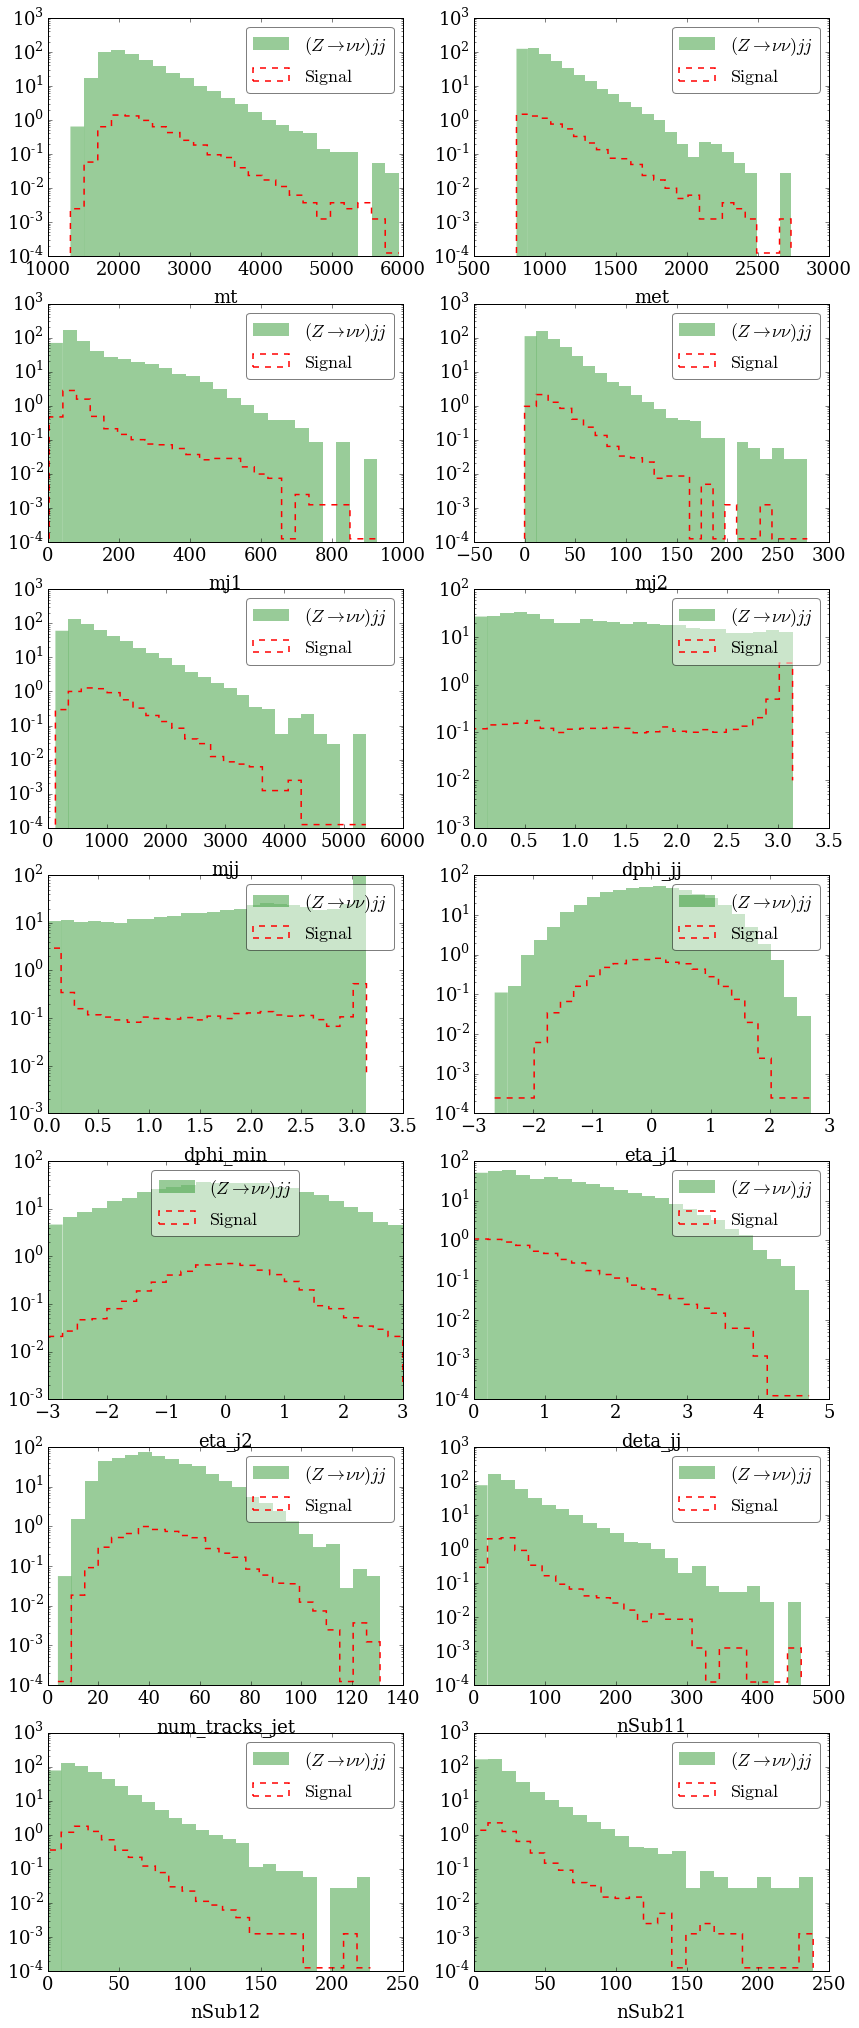

In [8]:
harry_plotter(sig,bkg_zjj)

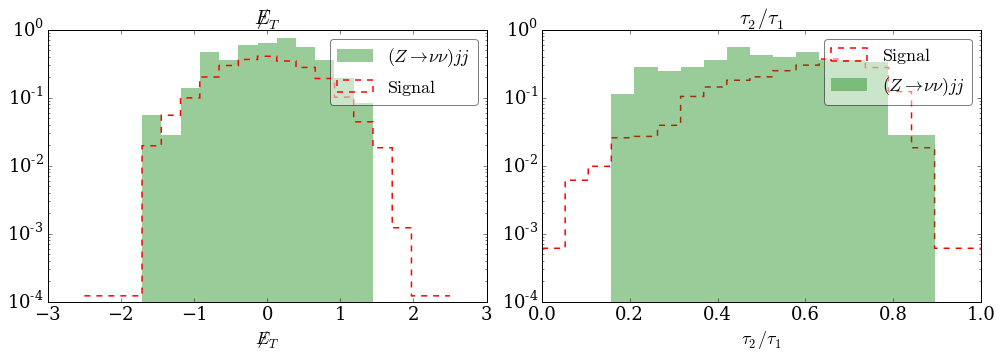

In [375]:
plt.rcParams['figure.figsize'] = 14., 5
plt.rc('axes', color_cycle=['r', 'g', 'b', 'y'])

binning = np.linspace(-2.5, 2.5, 20)
binningPhi = np.linspace(0, np.pi, 30)

fig, axs = plt.subplots(1,2)

axs[0].hist([list(bkg_zjj.data['eta_j1'])],  bins=binning, stacked=True,color="green", weights=[bkg_zjj.w],
         log=True,
         alpha=0.4, lw=0, label=r"$(Z\rightarrow\nu\nu)jj$")
axs[0].hist(list(sig.data['eta_j1']), bins=binning, color="red", weights=sig.w,
         alpha=1.0, lw=1.5, label=r"${\rm Signal}$",histtype="step",linestyle="dashed",log=True)
axs[0].set_xlabel(r"$\slash  E_{T}$", labelpad=5)
axs[0].legend(loc='upper right', fancybox=True, framealpha=0.5)
axs[0].set_title(r"$\slash  E_{T}$")


axs[1].hist([a/b for a,b in zip(list(sig.data['nSub12']),list(sig.data['nSub11']))], bins=np.linspace(0, 1, 20), color="red", weights=sig.w,
         alpha=1.0, lw=1.5, label=r"${\rm Signal}$",histtype="step",linestyle="dashed",log=1)

axs[1].hist([a/b for a,b in zip(list(bkg_zjj.data['nSub12']),list(bkg_zjj.data['nSub11']))], bins=np.linspace(0, 1, 20), color="green", weights=bkg_zjj.w,
         log=True,
         alpha=0.4, lw=0, label=r"$(Z\rightarrow\nu\nu)jj$")



axs[1].set_xlabel(r"$\tau_2/\tau_1$", labelpad=5)
axs[1].set_title(r"$\tau_2/\tau_1$")



axs[1].legend(loc='best', fancybox=True, framealpha=0.5)


fig.tight_layout()

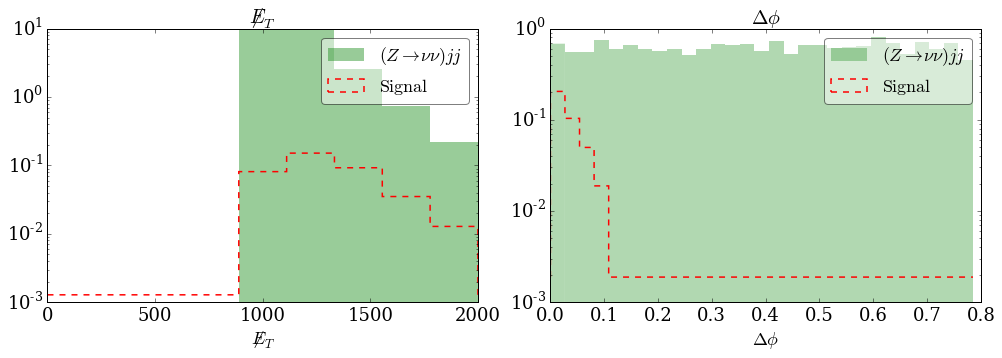

In [299]:
plt.rcParams['figure.figsize'] = 14., 5
plt.rc('axes', color_cycle=['r', 'g', 'b', 'y'])

binning = np.linspace(0, 2000, 10)
binningPhi = np.linspace(0, np.pi/4, 30)

fig, axs = plt.subplots(1,2)

axs[0].hist([list(bkg_zjj.data['met'])],  bins=binning, stacked=True,color="green", weights=[bkg_zjj.w],
         log=True,
         alpha=0.4, lw=0, label=r"$(Z\rightarrow\nu\nu)jj$")
axs[0].hist(list(sig.data['met']), bins=binning, color="red", weights=sig.w,
         alpha=1.0, lw=1.5, label=r"${\rm Signal}$",histtype="step",linestyle="dashed",log=True)
axs[0].set_xlabel(r"$\slash  E_{T}$", labelpad=5)
axs[0].legend(loc='upper right', fancybox=True, framealpha=0.5)
axs[0].set_title(r"$\slash  E_{T}$")


axs[1].hist(bkg_zjj.data['dphi_min'].values,  bins=binningPhi, stacked=True,color="green", weights=bkg_zjj.w,
         log=True,
         alpha=0.3, lw=0, label=r"$(Z\rightarrow\nu\nu)jj$")
axs[1].hist(list(sig.data['dphi_min']), bins=binningPhi, color="red", weights=sig.w,
         alpha=1.0, lw=1.5, label=r"${\rm Signal}$",histtype="step",linestyle="dashed",log=True)
axs[1].set_xlabel(r"$\Delta\phi$", labelpad=5)
axs[1].legend(loc='best', fancybox=True, framealpha=0.5)
axs[1].set_title(r"$\Delta\phi$")


fig.tight_layout()

In [ ]:
# #tau2/tau1 code

# axs[1][0].hist([a/b for a,b in zip(list(sig.data['nSub22']),list(sig.data['nSub12']))], bins=np.linspace(0, 5, 20), color="red", weights=sig.w,
#          alpha=1.0, lw=1.5, label=r"${\rm Signal}$",histtype="step",linestyle="dashed",log=1)

# axs[1][0].hist([a/b for a,b in zip(list(bkg_zjj.data['nSub22']),list(bkg_zjj.data['nSub12']))], bins=np.linspace(0, 5, 20), color="green", weights=bkg_zjj.w,
#          log=True,
#          alpha=0.4, lw=0, label=r"$(Z\rightarrow\nu\nu)jj$")

In [388]:
cut = 'dphi_min < .08 & mjj < 2500 & mjj > 600 & deta_jj < 1.5'

sig.select(cut)
bkg_zjj.select(cut)

In [389]:
pb = 1;
ab = 10**-6*pb;
lambda_y = .55

sigEff = len(sig.data)/len(Data(input_sig).data)
bkgEff = len(bkg_zjj.data)/len(Data(input_bkg_zjj).data)
print "Signal efficiency:",  sigEff
print "Background efficiency:",  bkgEff
print
Nsigevt = (lambda_y**4)*sig.meta['cxn'][0]*pb*(1/ab)*sigEff
Nbkgevt = bkg_zjj.meta['cxn'][0]*pb*(1/ab)*bkgEff
print "Signal events expected in 1 /ab:", Nsigevt
print "Background events expected in 1 /ab:", Nbkgevt

Signal efficiency: 0.3646
Background efficiency: 0.0070341987876

Signal events expected in 1 /ab: 52.9086633889
Background events expected in 1 /ab: 195.213788173


In [47]:
print sig.data.columns.values 

['mt' 'met' 'mj1' 'mj2' 'mjj' 'dphi_jj' 'dphi_min' 'eta_j1' 'eta_j2'
 'deta_jj' 'num_tracks_jet' 'nSub11' 'nSub12' 'nSub21' 'nSub22']


## Event display

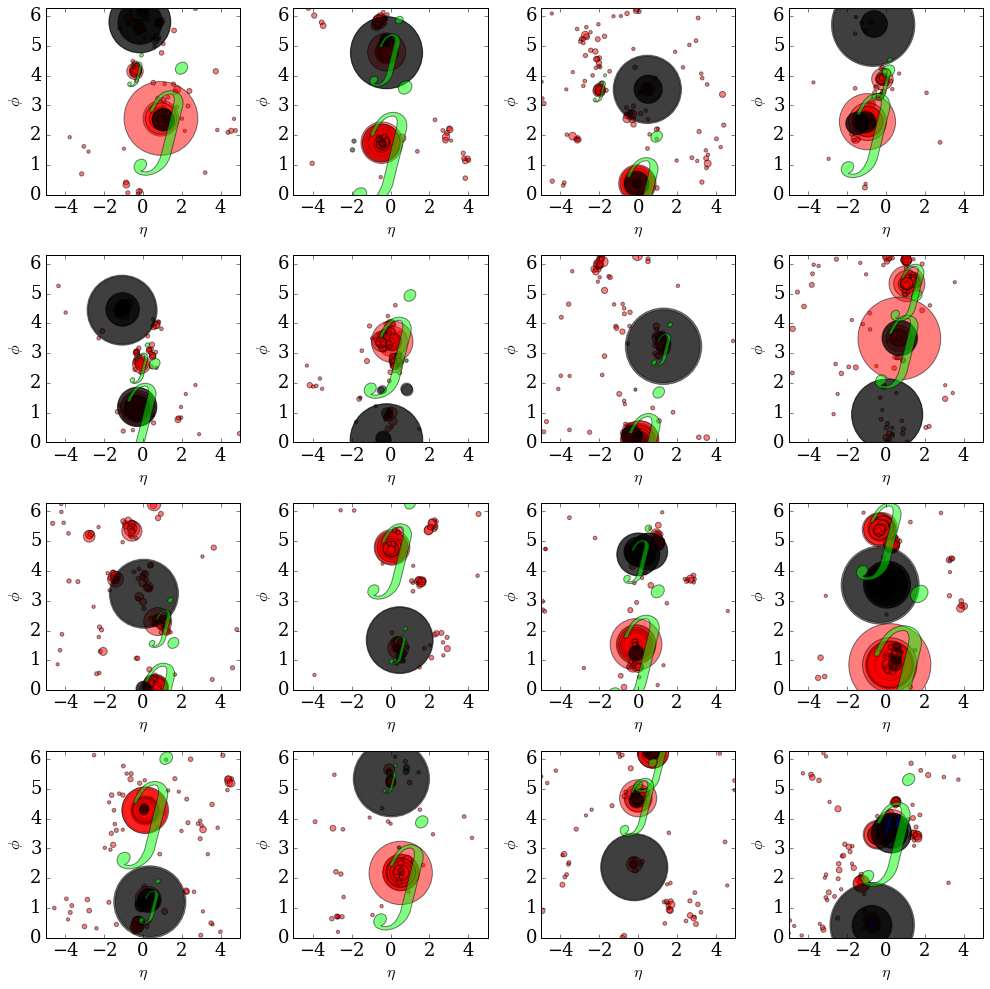

In [48]:
uq=[]
for i in sig.obj.xs(('vis'),level=('type')).index.values:
    uq.append(i[0])
uq=np.unique(uq)

plt.rcParams['figure.figsize'] = 14, 14 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['font.size'] = 16

 
fig, axs = plt.subplots(4,4)

n_events=16;
i_events=0;
for i in range(int(np.sqrt(n_events))):
    for j in range(int(np.sqrt(n_events))):
    
        vislist=sig.obj.xs((uq[i_events],'vis'),level=('evt','type'))
        invislist=sig.obj.xs((uq[i_events],'invis'),level=('evt','type'))
        muonlist=sig.obj.xs((uq[i_events],'muon'),level=('evt','type'))
        jetlist=sig.obj.xs((uq[i_events],'jet'),level=('evt','type'))

        axs[i][j].scatter(vislist['eta'], vislist['phi'], s=10*vislist['pt'], c=[1,0,0],alpha=0.5)
        axs[i][j].scatter(invislist['eta'], invislist['phi'], s=10*invislist['pt'], c=[0,0,0], alpha=0.5)
        axs[i][j].scatter(muonlist['eta'], muonlist['phi'], s=10*muonlist['pt'], c=[0,0,1],alpha=0.5, marker='$\mu$' )
        axs[i][j].scatter(jetlist['eta'], jetlist['phi'], s=10*jetlist['pt'], c=[0,1,0],alpha=0.5, marker='$j$' )

        axs[i][j].set_xlabel('$\eta$')
        axs[i][j].set_ylabel('$\phi$')

        axs[i][j].set_xlim(-5,  5)
        axs[i][j].set_ylim(0, 2*np.pi)
 
        
        i_events+=1;
        
plt.tight_layout()
plt.show()

## Limits and stuff

In [24]:
# Open data files simulating events in that last ATLAS MET bin control region

input_sig_100 = Data("./ATLAS_Excl/tchannel_8TeV_met1000_mchi100")
input_sig_200 = Data("./ATLAS_Excl/tchannel_8TeV_met1000_mchi200")
input_sig_400 = Data("./ATLAS_Excl/tchannel_8TeV_met1000_mchi400")
input_sig_600 = Data("./ATLAS_Excl/tchannel_8TeV_met1000_mchi600")
input_sig_800 = Data("./ATLAS_Excl/tchannel_8TeV_met1000_mchi800")
input_sig_1000 = Data("./ATLAS_Excl/tchannel_8TeV_met1000_mchi1000")
input_sig_2000 = Data("./ATLAS_Excl/tchannel_8TeV_met1000_mchi2000")
input_sig_3000 = Data("./ATLAS_Excl/tchannel_8TeV_met1000_mchi3000")

In [25]:
pb = 1;
ab = 10**-6*pb;
nevents=4.


lambda_excl_ATLAS=[]
lambda_excl_ATLAS.append((nevents/(input_sig_100.meta['cxn'][0]*pb*((.02)/ab)))**.25)
lambda_excl_ATLAS.append((nevents/(input_sig_200.meta['cxn'][0]*pb*((.02)/ab)))**.25)
lambda_excl_ATLAS.append((nevents/(input_sig_400.meta['cxn'][0]*pb*((.02)/ab)))**.25)
lambda_excl_ATLAS.append((nevents/(input_sig_600.meta['cxn'][0]*pb*((.02)/ab)))**.25)
lambda_excl_ATLAS.append((nevents/(input_sig_800.meta['cxn'][0]*pb*((.02)/ab)))**.25)
lambda_excl_ATLAS.append((nevents/(input_sig_1000.meta['cxn'][0]*pb*((.02)/ab)))**.25)
lambda_excl_ATLAS.append((nevents/(input_sig_2000.meta['cxn'][0]*pb*((.02)/ab)))**.25)
lambda_excl_ATLAS.append((nevents/(input_sig_3000.meta['cxn'][0]*pb*((.02)/ab)))**.25)

m_excl_ATLAS=[]
m_excl_ATLAS=[100,200,400,600,800,1000,2000,3000]

In [26]:
# Open data files simulating events for CMS13 with MET > 800 GeV and some basic cuts

input_sig_100 = Data("./CMS_13/tchannel_13TeV_met800_mchitilde100")
input_sig_400 = Data("./CMS_13/tchannel_13TeV_met800_mchitilde400")
input_sig_600 = Data("./CMS_13/tchannel_13TeV_met800_mchitilde600")
input_sig_800 = Data("./CMS_13/tchannel_13TeV_met800_mchitilde800")
input_sig_1000 = Data("./CMS_13/tchannel_13TeV_met800_mchitilde1000")
input_sig_2000 = Data("./CMS_13/tchannel_13TeV_met800_mchitilde2000")
input_sig_3000 = Data("./CMS_13/tchannel_13TeV_met800_mchitilde3000")

input_bkg = Data("./CMS_13/zjj_13TeV_met800")

In [27]:
# Apply some basic cuts

cut = 'dphi_min < .08 & mjj < 2500 & mjj > 600 & deta_jj < 1.5'

input_sig_100.select(cut)
input_sig_400.select(cut)
input_sig_600.select(cut)
input_sig_800.select(cut)
input_sig_1000.select(cut)
input_sig_2000.select(cut)
input_sig_3000.select(cut)

input_bkg.select(cut)

In [42]:
def signif(sig, bkg,name_sig,name_bkg, sign):
    
    sigEff = len(sig.data)/len(Data(name_sig).data)
    bkgEff = len(bkg.data)/len(Data(name_bkg).data)

    nsig = sig.meta['cxn'][0]*pb*(1/ab)*sigEff
    nbkg = bkg.meta['cxn'][0]*pb*(1/ab)*bkgEff


    func = lambda lamb: (((lamb**4)*nsig)/np.sqrt((lamb**4)*nsig+nbkg)) - sign
    from scipy.optimize import fsolve
    return fsolve(func, 1)[0]

In [44]:
lambda_excl_13=[]
lambda_excl_13.append(signif(input_sig_100,input_bkg,"./CMS_13/tchannel_13TeV_met800_mchitilde100","./CMS_13/zjj_13TeV_met800",3))
lambda_excl_13.append(signif(input_sig_400,input_bkg,"./CMS_13/tchannel_13TeV_met800_mchitilde400","./CMS_13/zjj_13TeV_met800",3))
lambda_excl_13.append(signif(input_sig_600,input_bkg,"./CMS_13/tchannel_13TeV_met800_mchitilde600","./CMS_13/zjj_13TeV_met800",3))
lambda_excl_13.append(signif(input_sig_800,input_bkg,"./CMS_13/tchannel_13TeV_met800_mchitilde800","./CMS_13/zjj_13TeV_met800",3))
lambda_excl_13.append(signif(input_sig_1000,input_bkg,"./CMS_13/tchannel_13TeV_met800_mchitilde1000","./CMS_13/zjj_13TeV_met800",3))
lambda_excl_13.append(signif(input_sig_2000,input_bkg,"./CMS_13/tchannel_13TeV_met800_mchitilde2000","./CMS_13/zjj_13TeV_met800",3))
lambda_excl_13.append(signif(input_sig_3000,input_bkg,"./CMS_13/tchannel_13TeV_met800_mchitilde3000","./CMS_13/zjj_13TeV_met800",3))

m_excl_13=[]
m_excl_13=[100,400,600,800,1000,2000,3000]

In [32]:
GeV = 10**6;
eV = 10**-9*GeV;
KeV = 10**-6*GeV;
MeV = 10**-3*GeV;
TeV = 10**3*GeV;

Sec = (1/(6.582119*10**-16))/eV; 
Kmps = 3.3356*10**-6;
Centimeter = 5.0677*10**13/GeV;
mm = 0.1*Centimeter;
Meter = 100*Centimeter;
Km = 10**5*Centimeter;
Kilogram = 5.6085*10**35*eV;
Day = 86400*Sec;
Year = 365*Day;
KgDay = Kilogram*Day;
amu = 1.66053892*10**-27*Kilogram;
Mpc = 3.086*10**24*Centimeter;

def lambda_excl_disp(m_chi): 
    return ((32*np.pi/(3*4))*(m_chi*GeV)**4/((5*MeV)**2*(20*GeV)**3*1*mm))**0.25

def lambda_excl_jj(m_chi): 
    return (8*np.pi*.1**5*m_chi/175)**0.5

In [33]:
m_disp = np.linspace(100,3000,100) # 100 linearly spaced numbers
lambda_disp = lambda_excl_disp(m_disp) 

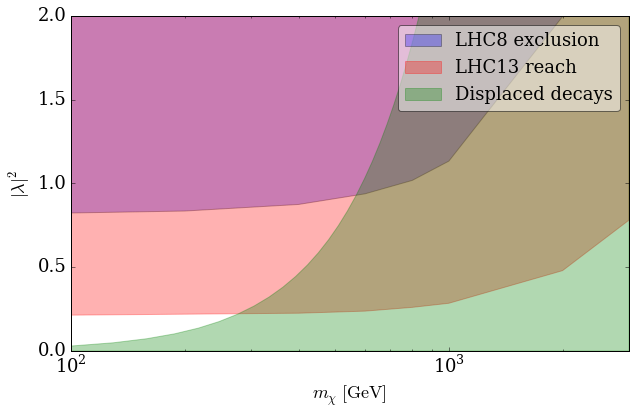

In [45]:
plt.rcParams['figure.figsize'] = 10., 6

plt.fill_between(m_excl_ATLAS,np.square(lambda_excl_ATLAS),100,alpha=0.3, label="LHC8 exclusion")
plt.fill_between(m_excl_13,np.square(lambda_excl_13),100,alpha=0.3, color="red", label="LHC13 reach")
plt.fill_between(m_disp,np.square(lambda_disp),0,alpha=0.3, color="green", label="Displaced decays")

plt.xscale("log")
plt.ylabel("$|\lambda|^2$")
plt.yscale("linear")


plt.xlabel(r"$m_{\chi}$ $\rm[GeV]$ ")
plt.xlim(100,3000)
plt.ylim(0,2)
#plt.yscale("log")
plt.legend(loc='best', fancybox=True, framealpha=0.5)
#plt.savefig("tchannel_limits_displaced.pdf")